### Try it 10.1: Decomposing Time Series


<center>
    <img src = 'images/spots.png' /><img src = 'images/air.png' />
</center>


 

This activity fouses on exploring two different time series and the decomposed elements.  The example of sunspots data is given as well as a dataset containing air passenger information through the twentieth century in the United States.  These are both time series datasets however there is a distinct difference in the nature of the time series.  

Below, you are to use the statsmodels function `seasonal_decompose` to show how the trend and seasonality of the series differ in (perhaps) expected ways.  To begin, you are to make sure the datasets contain an appropriate time stamp index -- statsmodels expects this.  Then, use the `seasonal_decompose` function to decompose the series into trend and seasonality.  Examing plots of these elements, and discuss the similarities and differences between these components for the two time series.  

In [148]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np


from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsaplots
from statsmodels.tsa.seasonal import _extrapolate_trend

In [136]:
sunspots = pd.read_csv('data/Sunspots.csv')
air = pd.read_csv('data/AirPassengers.csv', header=0, index_col=0)


# Seasonal Air - Additive

In [150]:
seasonal_air_add = seasonal_decompose(air, model='additive',period=12)

Text(0, 0.5, 'Number of Passengers')

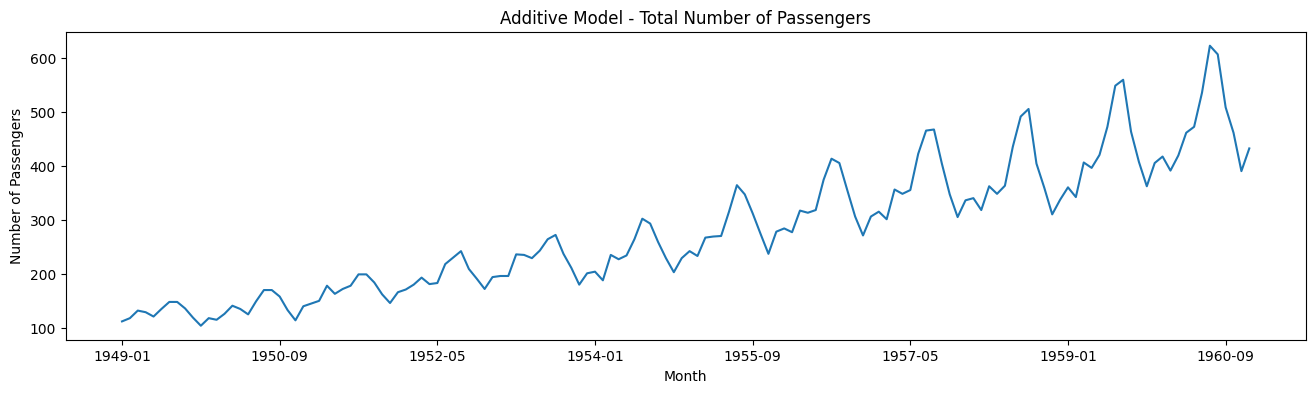

In [151]:
seasonal_air_add.observed.plot(figsize=(16,4))
plt.title('Additive Model - Total Number of Passengers')
plt.ylabel('Number of Passengers')

Text(0, 0.5, 'Number of Passengers')

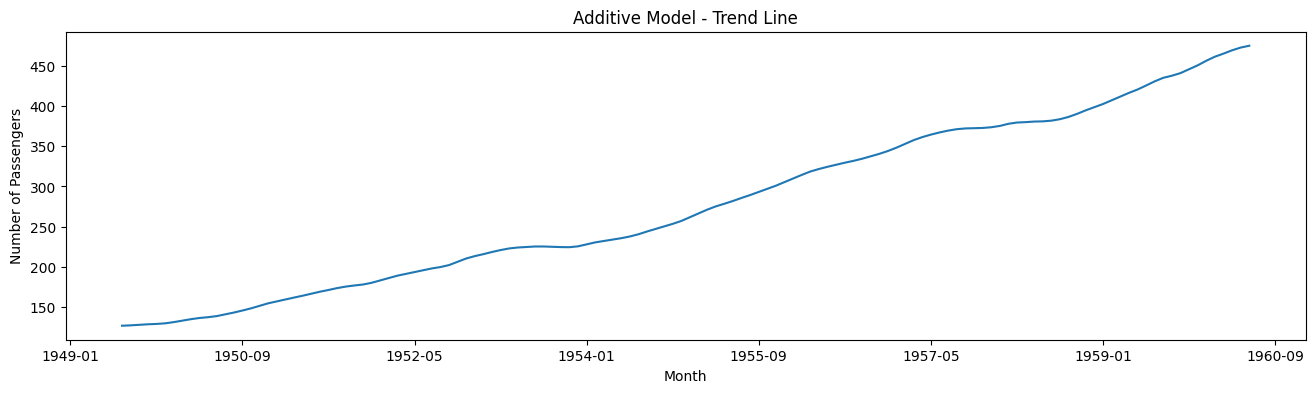

In [152]:
seasonal_air_add.trend.plot(figsize=(16,4))
plt.title('Additive Model - Trend Line')
plt.ylabel('Number of Passengers')

Text(0, 0.5, 'Number of Passengers')

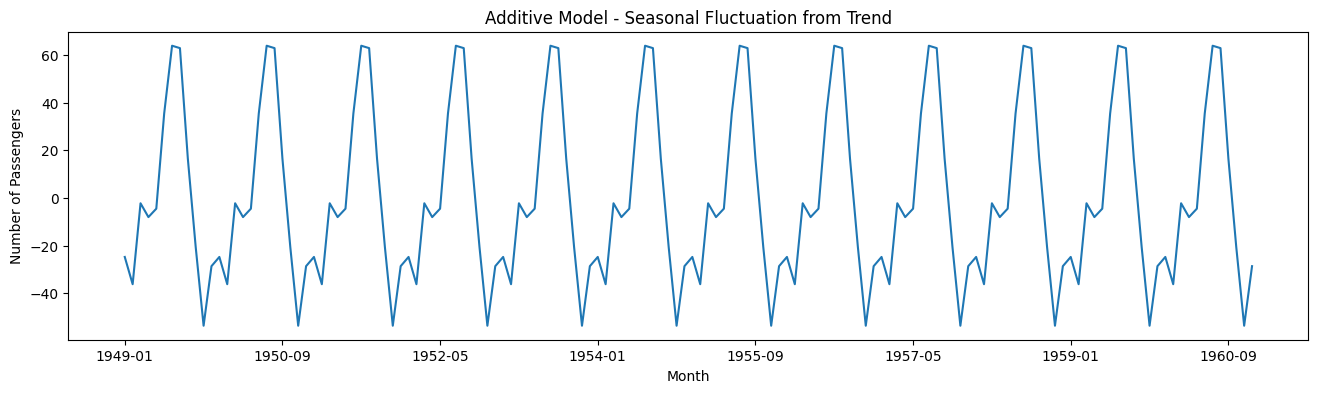

In [153]:
seasonal_air_add.seasonal.plot(figsize=(16,4))
plt.title('Additive Model - Seasonal Fluctuation from Trend')
plt.ylabel('Number of Passengers')

Text(0, 0.5, 'Number of Passengers')

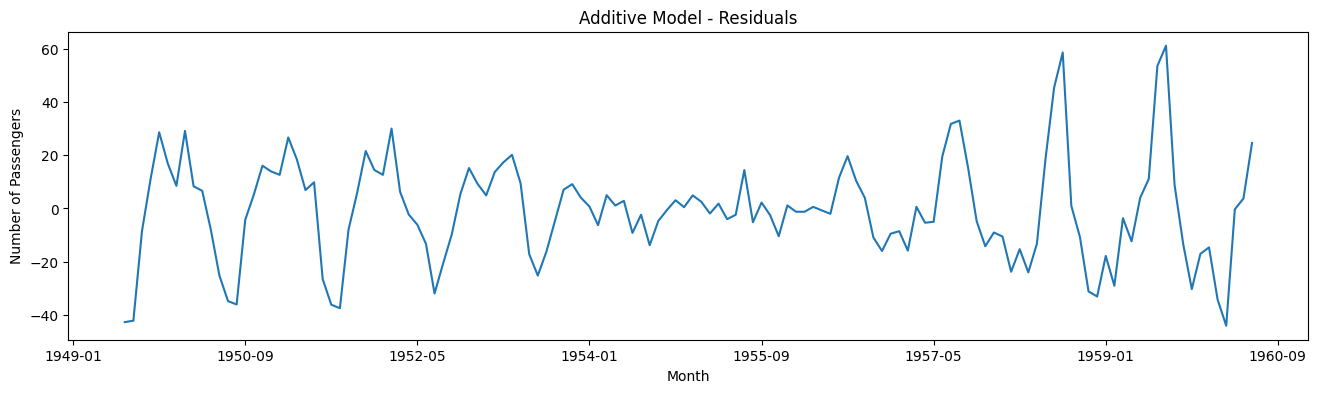

In [154]:
seasonal_air_add.resid.plot(figsize=(16,4))
plt.title('Additive Model - Residuals')
plt.ylabel('Number of Passengers')

In [164]:
# Mean Absolute Error
MAEm = np.abs(seasonal_air_add.resid).mean()
#Root Mean Square Error
RMSEm = np.sqrt( np.square(seasonal_air_add.resid).mean() )
print('Mean Absolute, Root Mean Squared Errors')
MAEm, RMSEm

Mean Absolute, Root Mean Squared Errors


(14.411807468625652, 19.28177692682183)

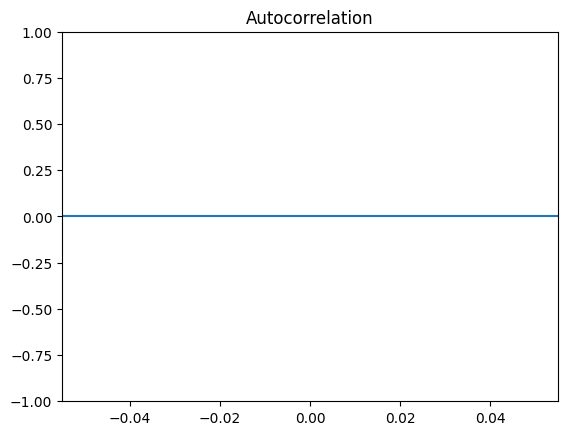

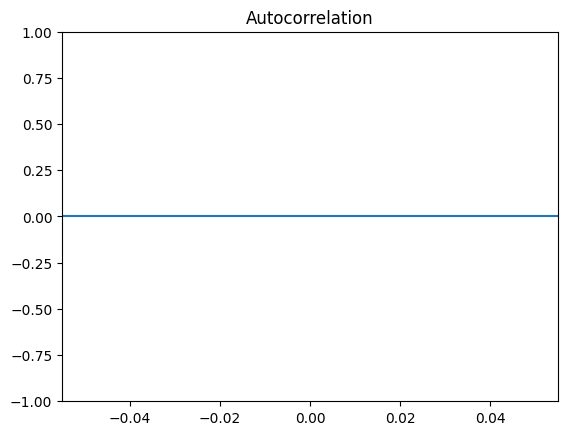

In [156]:
tsaplots.plot_acf(seasonal_air_add.resid,lags=20, ax=None)


# Seasonal Air - Multiplicative

In [157]:
seasonal_air_mult = seasonal_decompose(air, model='multiplicative',period=12)

Text(0, 0.5, 'Number of Passengers')

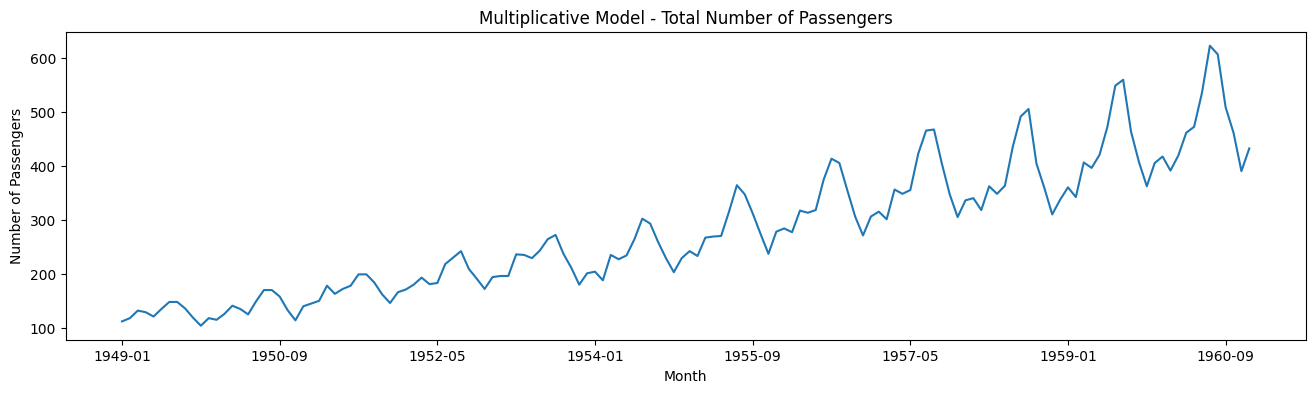

In [158]:
seasonal_air_mult.observed.plot(figsize=(16,4))
plt.title('Multiplicative Model - Total Number of Passengers')
plt.ylabel('Number of Passengers')

Text(0, 0.5, 'Number of Passengers')

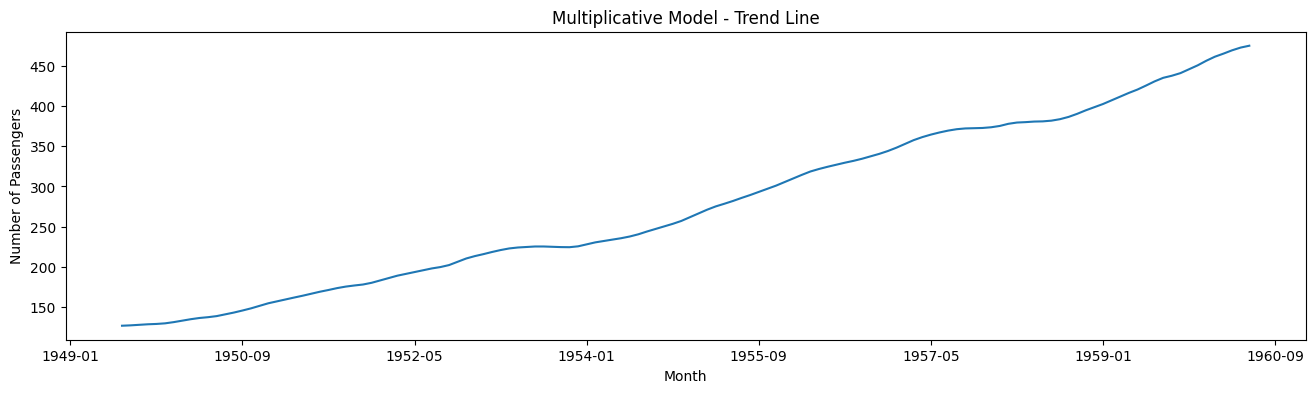

In [159]:
seasonal_air_mult.trend.plot(figsize=(16,4))
plt.title('Multiplicative Model - Trend Line')
plt.ylabel('Number of Passengers')

Text(0, 0.5, 'Number of Passengers')

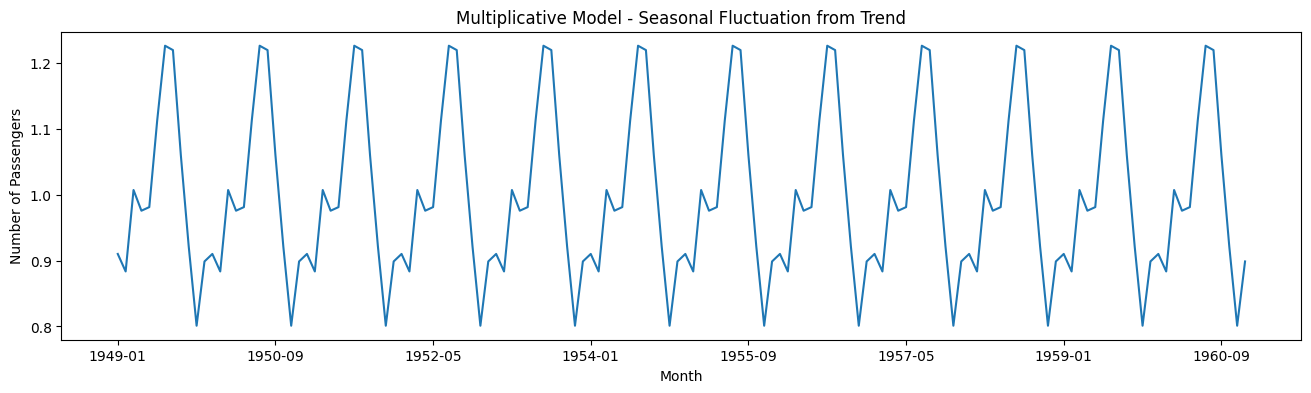

In [160]:
seasonal_air_mult.seasonal.plot(figsize=(16,4))
plt.title('Multiplicative Model - Seasonal Fluctuation from Trend')
plt.ylabel('Number of Passengers')

Text(0, 0.5, 'Number of Passengers')

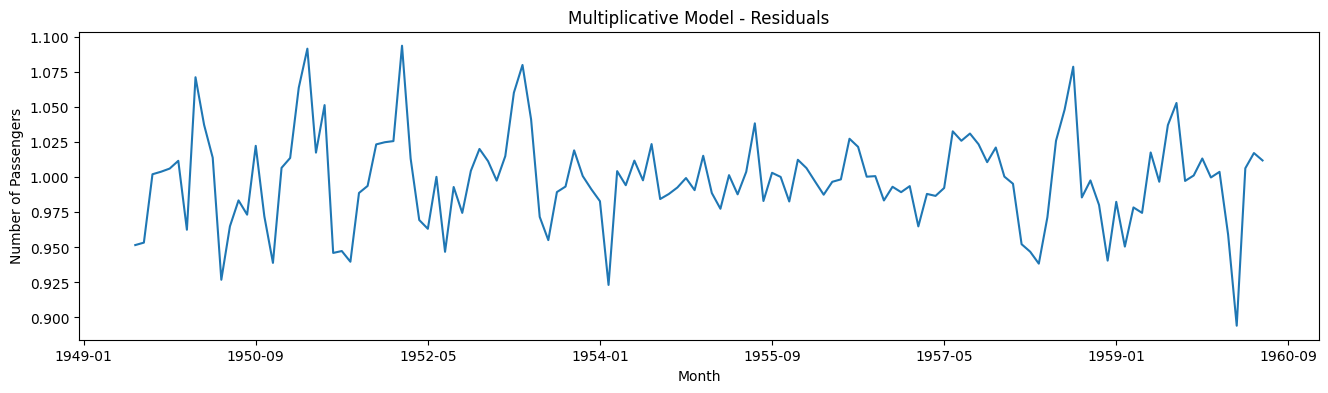

In [161]:
seasonal_air_mult.resid.plot(figsize=(16,4))
plt.title('Multiplicative Model - Residuals')
plt.ylabel('Number of Passengers')

In [165]:
# Mean Absolute Error
MAEm = np.abs(seasonal_air_mult.resid).mean()
#Root Mean Square Error
RMSEm = np.sqrt( np.square(seasonal_air_mult.resid).mean() )
print('Mean Absolute, Root Mean Squared Errors')
MAEm, RMSEm

Mean Absolute, Root Mean Squared Errors


(0.9982356582764101, 0.9987896520729924)

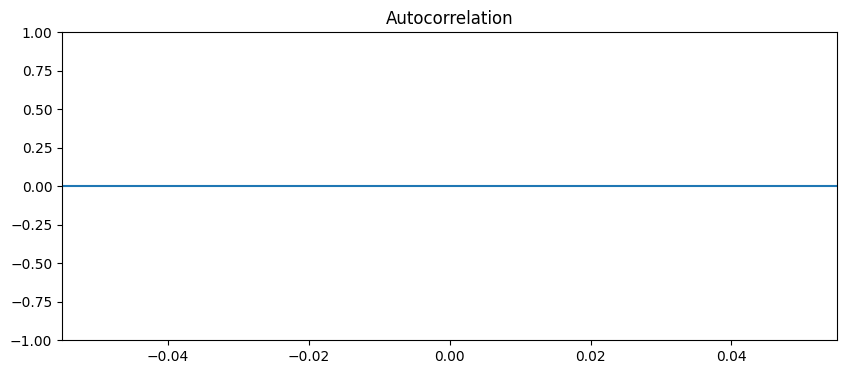

In [163]:
_, ax = plt.subplots(figsize=(10,4))
tsaplots.plot_acf(seasonal_air_mult.resid,lags=20, ax=ax)
plt.show()

# Sunspots - Additive

In [171]:
sunspots = sunspots.set_index(pd.to_datetime(sunspots['Date'])) \
    .drop(columns=['Unnamed: 0','Date']) \
    .rename(columns={'Monthly Mean Total Sunspot Number':'values'})

In [172]:
seasonal_sun_add = seasonal_decompose(sunspots, model='additive',period=130)

Text(0, 0.5, 'Number of Sunspots')

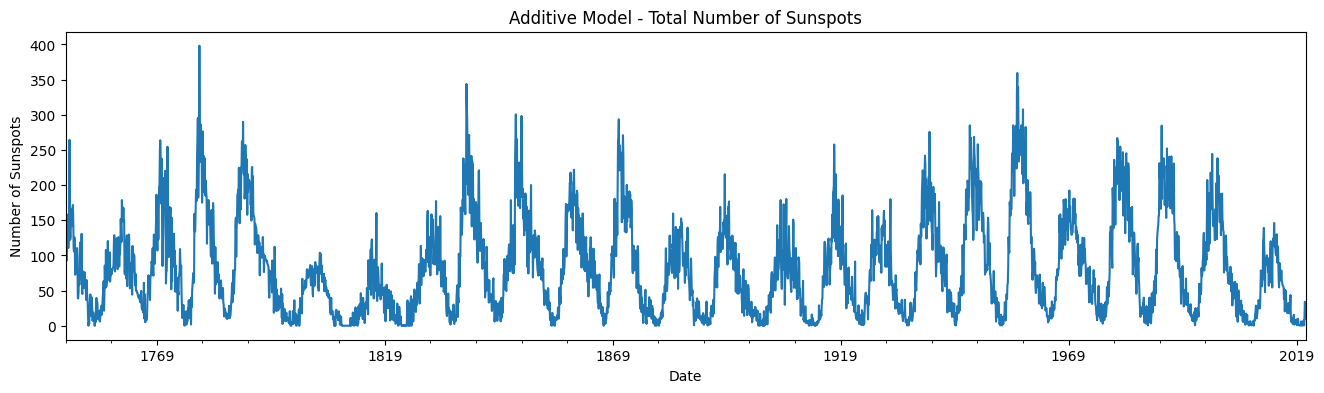

In [173]:
seasonal_sun_add.observed.plot(figsize=(16,4))
plt.title('Additive Model - Total Number of Sunspots')
plt.ylabel('Number of Sunspots')

Text(0, 0.5, 'Number of Sunspots')

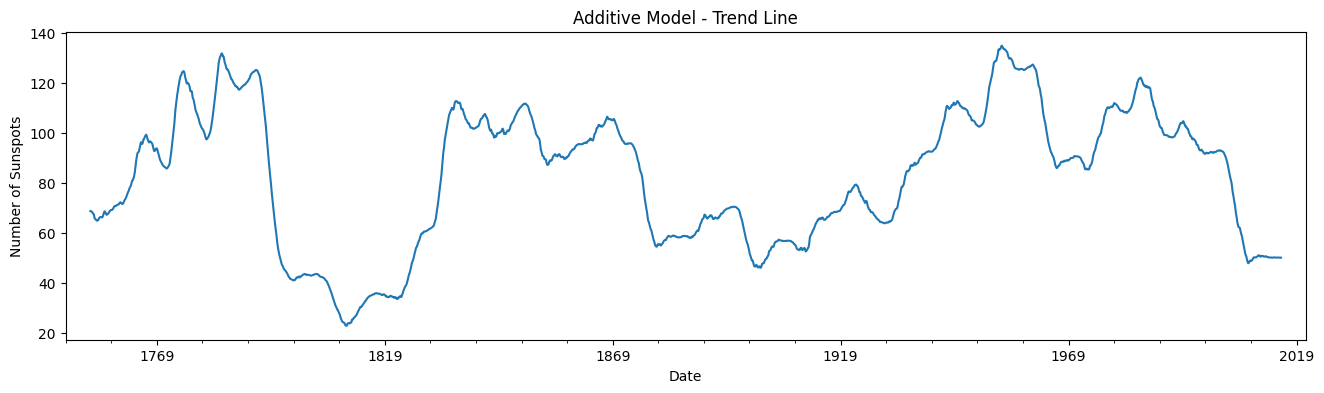

In [174]:
seasonal_sun_add.trend.plot(figsize=(16,4))
plt.title('Additive Model - Trend Line')
plt.ylabel('Number of Sunspots')

Text(0, 0.5, 'Number of Sunspots')

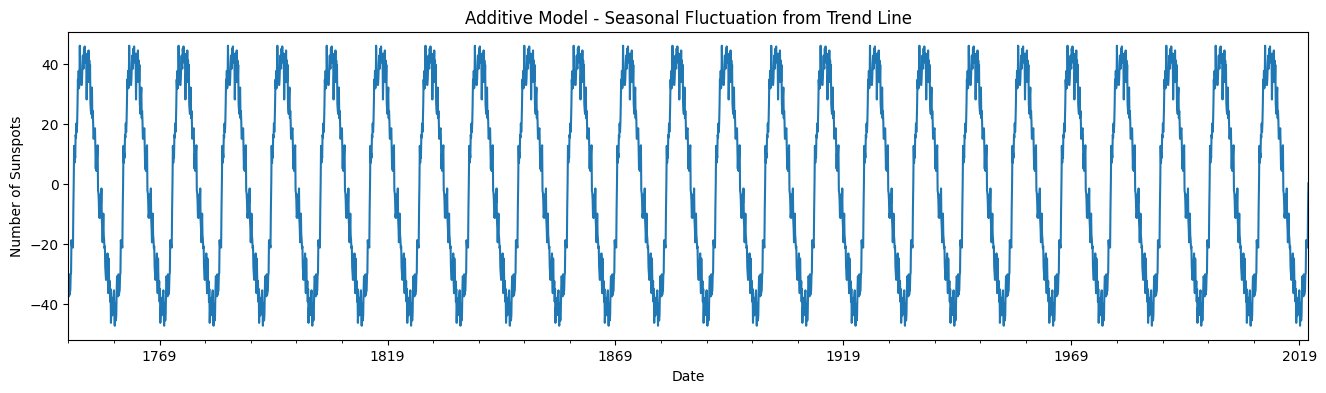

In [175]:
seasonal_sun_add.seasonal.plot(figsize=(16,4))
plt.title('Additive Model - Seasonal Fluctuation from Trend Line')
plt.ylabel('Number of Sunspots')

Text(0, 0.5, 'Number of Sunspots')

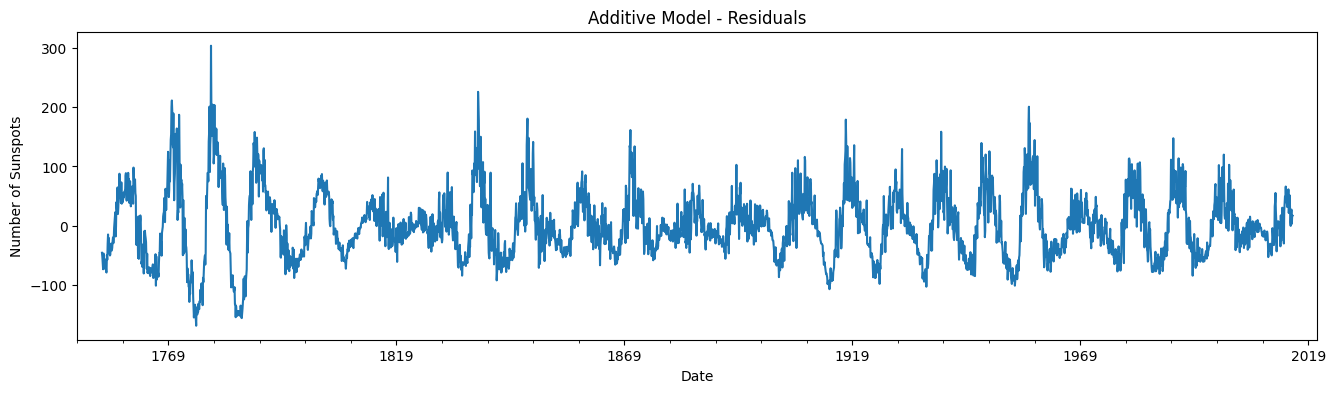

In [176]:
seasonal_sun_add.resid.plot(figsize=(16,4))
plt.title('Additive Model - Residuals')
plt.ylabel('Number of Sunspots')

In [177]:
# Mean Absolute Error
MAEm = np.abs(seasonal_sun_add.resid).mean()
#Root Mean Square Error
RMSEm = np.sqrt( np.square(seasonal_sun_add.resid).mean() )
print('Mean Absolute, Root Mean Squared Errors')
MAEm, RMSEm

Mean Absolute, Root Mean Squared Errors


(42.84058299440999, 55.515107448186846)

C:\Users\sspillane\AppData\Local\Temp\ipykernel_2328\1245229927.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  snap.show()


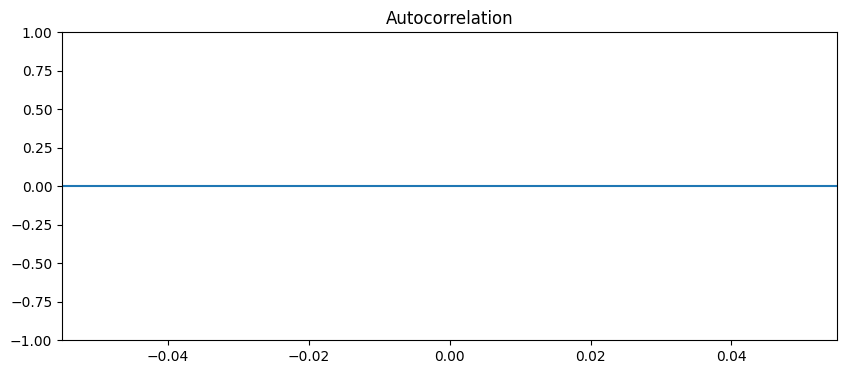

In [127]:
_, ax = plt.subplots(figsize=(10,4))
snap = tsaplots.plot_acf(seasonal_sun_add.resid, lags=5, ax=ax)
snap.show()